In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Function to load TSV files with error handling
def load_tsv(file_path):
    try:
        df = pd.read_csv(file_path, sep="\t", header = None, on_bad_lines='skip')  # Skip problematic lines
        print(f"Successfully loaded {file_path} with {df.shape[0]} rows and {df.shape[1]} columns.")
        return df
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

In [3]:
file_actions_148k = "protein.actions.SHS148k.tsv"
file_sequences = "protein.sequences.dictionary.both.tsv"

In [4]:
df_actions_148k = pd.read_csv("protein.actions.SHS148k.tsv", sep="\t")

In [5]:
df_sequences = load_tsv("protein.sequences.dictionary.both.tsv")

Successfully loaded protein.sequences.dictionary.both.tsv with 20456 rows and 2 columns.


In [6]:
# Display the first few rows as a table
display(df_actions_148k.head())

item_id_a  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  9606.ENSP00000000233   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...  9606.ENSP00000000233   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...  9606.ENSP00000000233   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  9606.ENSP00000000233   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...  9606.ENSP00000000233   

                                                                                                                  item_id_b  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  9606.ENSP00000263025   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...  9606.ENSP00000265709   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...  9606.ENSP00000265709   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  9606.ENSP00000263025   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...  9606.ENSP00000265709   

                                                                                                             mode  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...       ptmod   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...    reaction   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...   catalysis   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  inhibition   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...     binding   

                                                                                                           action  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...         NaN   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...         NaN   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...         NaN   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  inhibition   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...         NaN   

                                                                                                      is_directional  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...              f   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...              f   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...              t   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...              t   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...              f   

                                                                                                      a_is_acting  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...           f   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...           f   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...         

In [7]:
# Rename the columns manually
df_sequences.rename(columns={df_sequences.columns[0]: "Sequence", df_sequences.columns[1]: "item_id"}, inplace=True)

In [8]:
# Display the updated dataframe
display(df_sequences.head())

,Sequence,item_id
0,9606.ENSP00000000233,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...
1,9606.ENSP00000000412,MFPFYSCWRTGLLLLLLAVAVRESWQTEEKTCDLVGEKGKESEKEL...
2,9606.ENSP00000000442,MSSQVVGIEPLYIKAEPASPDSPKGSSETETEPPVALAPGPAPTRC...
3,9606.ENSP00000001008,MTAEEMKATESGAQSAPLPMEGVDISPKQDEGVLKVIKREGTGTEM...
4,9606.ENSP00000001146,MLFEGLDLVSALATLAACLVSVTLLLAVSQQLWQLRWAATRDKSCK...


In [9]:
# Reset index to move sequence_a and sequence_b back into columns
df_actions_148k.reset_index(inplace=True)

In [10]:
# Rename the newly created columns
df_actions_148k.rename(columns={"index": "sequence_a", df_actions_148k.columns[1]: "sequence_b"}, inplace=True)

In [11]:
# Display the updated dataframe
display(df_actions_148k.head())

,level_0,sequence_b,item_id_a,item_id_b,mode,action,is_directional,a_is_acting,score
0,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,ptmod,NaN,f,f,150
1,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,reaction,NaN,f,f,908
2,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,catalysis,NaN,t,t,908
3,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,inhibition,inhibition,t,t,154
4,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,binding,NaN,f,t,908


In [12]:
# Rename the first two unnamed columns
df_actions_148k.rename(columns={df_actions_148k.columns[0]: "sequence_a"}, inplace=True)

# Display the updated dataframe
display(df_actions_148k.head(20))

,sequence_a,sequence_b,item_id_a,item_id_b,mode,action,is_directional,a_is_acting,score
0,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,ptmod,NaN,f,f,150
1,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,reaction,NaN,f,f,908
2,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,catalysis,NaN,t,t,908
3,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,inhibition,inhibition,t,t,154
4,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,binding,NaN,f,t,908
5,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,catalysis,NaN,t,f,908
6,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,inhibition,inhibition,f,t,150
7,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,inhibition,inhibition,f,f,150
8,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,binding,NaN,f,f,908
9,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,catalysis,NaN,t,t,156


In [13]:
# Rename the first two unnamed columns
df_actions_148k.drop(columns={"action"}, inplace=True)

# Display the updated dataframe
display(df_actions_148k.head(20))

,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
0,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,ptmod,f,f,150
1,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,reaction,f,f,908
2,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,catalysis,t,t,908
3,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,inhibition,t,t,154
4,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,binding,f,t,908
5,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,catalysis,t,f,908
6,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,inhibition,f,t,150
7,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,inhibition,f,f,150
8,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,binding,f,f,908
9,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,catalysis,t,t,156


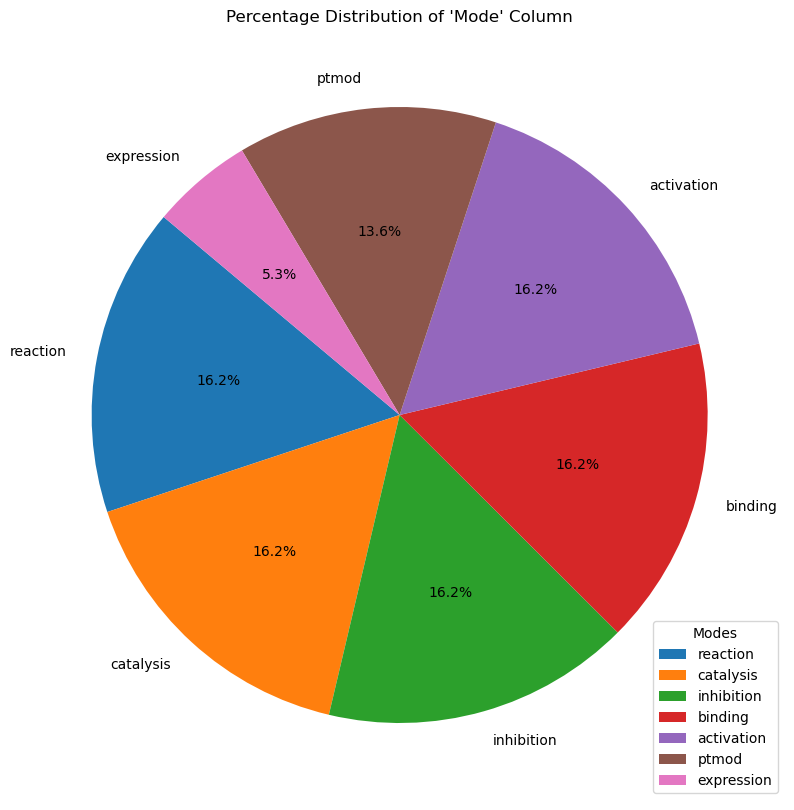

In [14]:
# Create a pie chart for the 'mode' column
plt.figure(figsize=(10, 10))
mode_counts = df_actions_148k['mode'].value_counts()
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Percentage Distribution of 'Mode' Column")
plt.legend(title="Modes", loc="best")
plt.show()

In [15]:
# Split df_actions_148k into separate dataframes based on 'mode' column
modes = ["reaction", "activation", "catalysis", "binding", "inhibition", "ptmod", "expression"]
df_action_splits = {mode: df_actions_148k[df_actions_148k['mode'] == mode] for mode in modes}

In [16]:
# Display each dataframe before saving
for mode, df_mode in df_action_splits.items():
    print(f"Displaying dataframe for mode: {mode}")
    display(df_mode.head())
    filename = f"df_actions_148k_{mode}.csv"
    df_mode.to_csv(filename, index=False)
    print(f"Saved {filename}")

Displaying dataframe for mode: reaction


,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
1,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,reaction,f,f,908
12,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGER...,9606.ENSP00000000233,9606.ENSP00000250971,reaction,t,t,900
15,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MSVIFFACVVRVRDGLPLSASTDFYHTQDFLEWRRRLKSLALRLAQ...,9606.ENSP00000000233,9606.ENSP00000264454,reaction,t,f,244
16,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MSVIFFACVVRVRDGLPLSASTDFYHTQDFLEWRRRLKSLALRLAQ...,9606.ENSP00000000233,9606.ENSP00000264454,reaction,t,t,244
17,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGER...,9606.ENSP00000000233,9606.ENSP00000250971,reaction,t,f,900


Saved df_actions_148k_reaction.csv
Displaying dataframe for mode: activation


,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
14,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MSSAAENGEAAPGKQNEEKTYKKTASSAIKGAIQLGIGYTVGNLTS...,9606.ENSP00000000233,9606.ENSP00000265382,activation,f,f,153
18,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGE...,9606.ENSP00000000233,9606.ENSP00000019317,activation,f,f,175
45,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MTLESMMACCLSDEVKESKRINAEIEKQLRRDKRDARRELKLLLLG...,9606.ENSP00000000233,9606.ENSP00000078429,activation,f,f,152
54,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MFSRRSHGDVKKSTQKVLDPKKDVLTRLKHLRALLDNVDANDLKQF...,9606.ENSP00000000233,9606.ENSP00000202677,activation,f,f,153
57,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MSLIRKKGFYKQDVNKTAWELPKTYVSPTHVGSGAYGSVCSAIDKR...,9606.ENSP00000000233,9606.ENSP00000211287,activation,f,f,157


Saved df_actions_148k_activation.csv
Displaying dataframe for mode: catalysis


,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
2,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,catalysis,t,t,908
5,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,catalysis,t,f,908
9,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,catalysis,t,t,156
13,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,catalysis,t,f,156
20,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAMAEGERTECAEPPRDEPPADGALKRAEELKTQANDYFKAKDYEN...,9606.ENSP00000000233,9606.ENSP00000012443,catalysis,t,f,155


Saved df_actions_148k_catalysis.csv
Displaying dataframe for mode: binding


,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
4,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,binding,f,t,908
8,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,binding,f,f,908
10,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,binding,f,t,156
11,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,binding,f,f,156
21,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAGSSTGGGGVGETKVIYHLDEEETPYLVKIPVPAERITLGDFKSV...,9606.ENSP00000000233,9606.ENSP00000005340,binding,f,f,171


Saved df_actions_148k_binding.csv
Displaying dataframe for mode: inhibition


,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
3,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,inhibition,t,t,154
6,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,inhibition,f,t,150
7,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,inhibition,f,f,150
34,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGE...,9606.ENSP00000000233,9606.ENSP00000019317,inhibition,f,t,175
36,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGE...,9606.ENSP00000000233,9606.ENSP00000019317,inhibition,f,f,175


Saved df_actions_148k_inhibition.csv
Displaying dataframe for mode: ptmod


,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
0,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,ptmod,f,f,150
31,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MSLIRKKGFYKQDVNKTAWELPKTYVSPTHVGSGAYGSVCSAIDKR...,9606.ENSP00000000233,9606.ENSP00000211287,ptmod,f,f,150
77,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MSSPPPARSGFYRQEVTKTAWEVRAVYRDLQPVGSGAYGAVCSAVD...,9606.ENSP00000000233,9606.ENSP00000215659,ptmod,f,f,150
89,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,9606.ENSP00000000233,9606.ENSP00000215832,ptmod,f,f,150
152,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,9606.ENSP00000000233,9606.ENSP00000229794,ptmod,f,f,150


Saved df_actions_148k_ptmod.csv
Displaying dataframe for mode: expression


,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
1114,MSSQVVGIEPLYIKAEPASPDSPKGSSETETEPPVALAPGPAPTRC...,MNLLDPFMKMTDEQEKGLSGAPSPTMSEDSAGSPCPSGSGSDTENT...,9606.ENSP00000000442,9606.ENSP00000245479,expression,t,t,423
1128,MSSQVVGIEPLYIKAEPASPDSPKGSSETETEPPVALAPGPAPTRC...,MAWDMCNQDSESVWSDIECAALVGEDQPLCPDLPELDLSELDVNDL...,9606.ENSP00000000442,9606.ENSP00000264867,expression,t,f,585
1219,MLFEGLDLVSALATLAACLVSVTLLLAVSQQLWQLRWAATRDKSCK...,MDVLVSECSARLLQQEEEIKSLTAEIDRLKNCGCLGASPNLEQLQE...,9606.ENSP00000001146,9606.ENSP00000231572,expression,t,f,467
1369,MLVAGLLLWASLLTGAWPSFPTQDHLPATPRVRLSFKELKATGTAH...,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,9606.ENSP00000002829,9606.ENSP00000269305,expression,t,f,467
1370,MLVAGLLLWASLLTGAWPSFPTQDHLPATPRVRLSFKELKATGTAH...,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,9606.ENSP00000002829,9606.ENSP00000269305,expression,t,t,467


Saved df_actions_148k_expression.csv


In [17]:
df_actions_148k.to_csv("df_actions_148k.csv", index=False)

In [36]:
# Drop rows with NaN or empty values
df_actions_148k_cleaned = df_actions_148k.dropna()

# Reset index after dropping rows
df_actions_148k_cleaned.reset_index(drop=True, inplace=True)

# Display the first few rows of the cleaned dataframe
display(df_actions_148k_cleaned.head())

,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
0,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,ptmod,f,f,150
1,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,reaction,f,f,908
2,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,catalysis,t,t,908
3,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,inhibition,t,t,154
4,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,binding,f,t,908


In [38]:
# Print the number of rows before and after cleaning
print(f"Rows before cleaning: {len(df_actions_148k)}")
print(f"Rows after cleaning: {len(df_actions_148k_cleaned)}")

Rows before cleaning: 148050
Rows after cleaning: 148050


In [40]:
# Function to check if a sequence contains 'X'
def contains_unknown_aa(sequence):
    return 'X' in sequence

# Check 'sequence_a' column
unknown_in_sequence_a = df_actions_148k['sequence_a'].apply(contains_unknown_aa).sum()

# Check 'sequence_b' column
unknown_in_sequence_b = df_actions_148k['sequence_b'].apply(contains_unknown_aa).sum()

# Total rows with 'X' in either 'sequence_a' or 'sequence_b'
total_unknown = unknown_in_sequence_a + unknown_in_sequence_b

print(f"Rows with 'X' in 'sequence_a': {unknown_in_sequence_a}")
print(f"Rows with 'X' in 'sequence_b': {unknown_in_sequence_b}")
print(f"Total rows with 'X': {total_unknown}")

Rows with 'X' in 'sequence_a': 1
Rows with 'X' in 'sequence_b': 16
Total rows with 'X': 17


In [45]:
df_actions_27k = pd.read_csv("df_actions_27k.csv")

In [46]:
# Function to check if a sequence contains 'X'
def contains_unknown_aa(sequence):
    return 'X' in sequence

# Check 'sequence_a' column
unknown_in_sequence_a = df_actions_27k['sequence_a'].apply(contains_unknown_aa).sum()

# Check 'sequence_b' column
unknown_in_sequence_b = df_actions_27k['sequence_b'].apply(contains_unknown_aa).sum()

# Total rows with 'X' in either 'sequence_a' or 'sequence_b'
total_unknown = unknown_in_sequence_a + unknown_in_sequence_b

print(f"Rows with 'X' in 'sequence_a': {unknown_in_sequence_a}")
print(f"Rows with 'X' in 'sequence_b': {unknown_in_sequence_b}")
print(f"Total rows with 'X': {total_unknown}")

Rows with 'X' in 'sequence_a': 0
Rows with 'X' in 'sequence_b': 0
Total rows with 'X': 0
